In [1]:
import pandas as pd
from fbprophet import Prophet

In [2]:
df = pd.read_csv('facebook_quarter.csv')
df.head()

,Quarter_Date,Facebook_Revenue_Millions_$US
0,2020-12-31,"$28,071"
1,2020-09-30,"$21,470"
2,2020-06-30,"$18,687"
3,2020-03-31,"$17,737"
4,2019-12-31,"$21,082"


In [3]:
# Remove the '$' sign
df['Facebook_Revenue_Millions_$US'] = df['Facebook_Revenue_Millions_$US'].replace('\$', '', regex=True)

# Remove the comma
df['Facebook_Revenue_Millions_$US'] = df['Facebook_Revenue_Millions_$US'].replace('\,', '', regex=True)

df['Quarter_Date'] = pd.to_datetime(df['Quarter_Date'])
df['Facebook_Revenue_Millions_$US'] = pd.to_numeric(df['Facebook_Revenue_Millions_$US'])


df.dtypes

Quarter_Date                     datetime64[ns]
Facebook_Revenue_Millions_$US           float64
dtype: object

In [7]:
company_quarter= df.rename(columns={"Quarter_Date": 'ds', 
                                 "Facebook_Revenue_Millions_$US": 'y'})
company_quarter

,ds,y
0,2020-12-31,28071.0
1,2020-09-30,21470.0
2,2020-06-30,18687.0
3,2020-03-31,17737.0
4,2019-12-31,21082.0
5,2019-09-30,17652.0
6,2019-06-30,16886.0
7,2019-03-31,15077.0
8,2018-12-31,16914.0
9,2018-09-30,13727.0


In [8]:
model = Prophet()
model.fit(company_quarter)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [9]:
future = model.make_future_dataframe(periods=8, freq='Q')
future.tail()

,ds
49,2021-12-31
50,2022-03-31
51,2022-06-30
52,2022-09-30
53,2022-12-31


In [10]:
forecast = model.predict(future)

In [11]:

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(20)

,ds,yhat,yhat_lower,yhat_upper
0,2008-12-31,907.797924,-170.248743,1877.944372
1,2009-12-31,905.942652,-137.397418,1845.678916
2,2010-03-31,-372.704083,-1337.452541,650.068967
3,2010-06-30,-42.888896,-1060.651414,968.718306
4,2010-09-30,70.286690,-939.152478,1066.148821
5,2010-12-31,1211.635730,240.049653,2228.672646
6,2011-03-31,343.081166,-735.429595,1341.286003
7,2011-06-30,782.270133,-273.710363,1844.485760
8,2011-09-30,694.220665,-318.569140,1674.061070
9,2011-12-31,1826.093991,865.859299,2897.366736


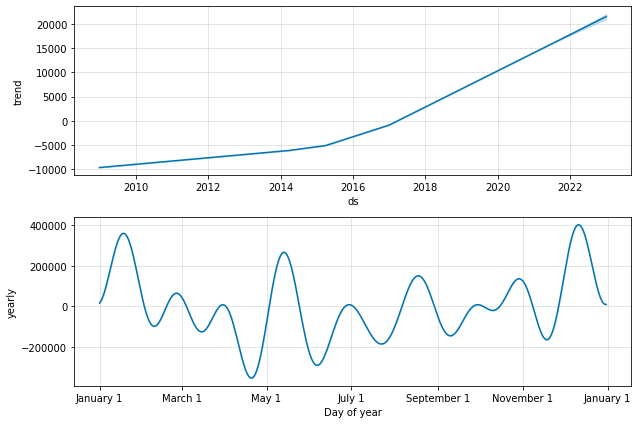

In [12]:

plot2 = model.plot_components(forecast)

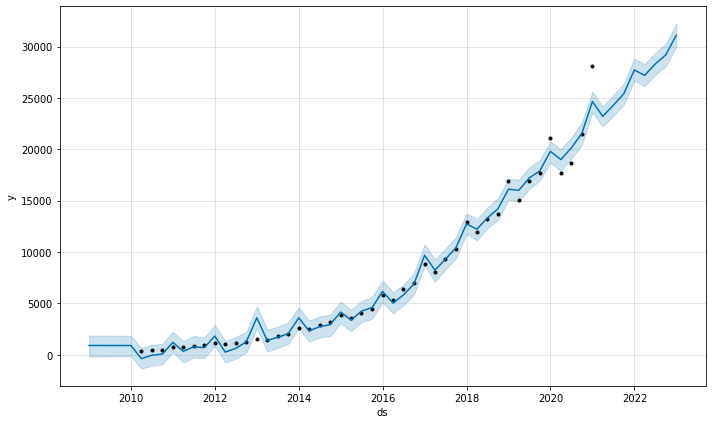

In [13]:

plot1 = model.plot(forecast)